In [66]:
import os, csv
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras import layers, Input
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import train_test_split

In [106]:
types = {'B_ID':8, 'E_ID':17, 'NE_ID':27, 'S_ID':10, 'P_ID':16}
x_val = []
x_id = []
for ids, vals in types.items():
    for i in range(1,vals+1):
        x_id.append(ids + str(i))
        try: 
            with open("./po-cf-ex-1-features/"+ids+str(i)+".csv", 'r') as f:
                temp = list(csv.reader(f, delimiter = ","))
            temp = np.asarray(temp)
            temp = temp[:,:2].astype(np.float64)
        except:
            print(ids, i)
        print(temp.shape)
        x_val.append(temp.tolist())
x_val = np.asarray(sequence.pad_sequences(x_val, maxlen=2500)).astype(np.float64)
print("x_val shape:", x_val.shape)
# len(x_val[1][0])

(505, 2)
(904, 2)
(479, 2)
(552, 2)
(996, 2)
(697, 2)
(561, 2)
(880, 2)
(1134, 2)
(799, 2)
(652, 2)
(591, 2)
(435, 2)
(520, 2)
(948, 2)
(602, 2)
(437, 2)
(928, 2)
(853, 2)
(754, 2)
(599, 2)
(568, 2)
(518, 2)
(507, 2)
(551, 2)
(520, 2)
(570, 2)
(912, 2)
(1094, 2)
(920, 2)
(1135, 2)
(627, 2)
(535, 2)
(417, 2)
(507, 2)
(714, 2)
(444, 2)
(314, 2)
(568, 2)
(838, 2)
(1003, 2)
(783, 2)
(817, 2)
(898, 2)
(1515, 2)
(577, 2)
(621, 2)
(399, 2)
(777, 2)
(526, 2)
(623, 2)
(813, 2)
(2487, 2)
(699, 2)
(288, 2)
(706, 2)
(1222, 2)
(405, 2)
(974, 2)
(1094, 2)
(1003, 2)
(1159, 2)
(596, 2)
(502, 2)
(1221, 2)
(781, 2)
(1543, 2)
(392, 2)
(568, 2)
(459, 2)
(476, 2)
(605, 2)
(499, 2)
(540, 2)
(453, 2)
(658, 2)
(532, 2)
(700, 2)
x_val shape: (78, 2500, 2)


In [128]:
# df = pd.read_excel("./KiMoRe/E_ID1/Es1/Label/ClinicalAssessment_E_ID1.xlsx")
# np.array(df).reshape((16,))
# df
po_val = []
cf_val = []
for ids in x_id:
    try:
        df = pd.read_excel("./KiMoRe/"+ids+"/Es1/Label/ClinicalAssessment_"+ids+".xlsx")
    except:
        print("problem in: ", ids)
    df = np.array(df).reshape((16,))
    po_val.append(df[6])
    cf_val.append(df[11])
po_val = np.asarray(po_val).astype(np.float64)
cf_val = np.asarray(cf_val).astype(np.float64)
print("shape of CF: ", cf_val.shape)
print("shape of PO: ", po_val.shape)
# print(po_val)
for i in range(78):
    if np.isnan(po_val[i]):
        po_val[i] = 0
print(po_val)


shape of CF:  (78,)
shape of PO:  (78,)
[15.         12.          9.39439192  7.78382608 13.         15.
  8.         14.33333333 14.66666667 14.33333333 13.33333333 14.
 14.33333333 15.         15.         14.66666667 15.         15.
 15.         15.         15.         15.         15.         15.
  0.         12.66666667 14.33333333 15.         14.33333333 13.
 14.         15.         15.         15.          7.         15.
 15.         15.         15.         12.         15.         13.
 13.         15.         13.         14.         14.         10.
 15.         13.         15.         15.          3.         11.
 15.          6.          7.58350731  8.41349572  6.33333333 11.
  6.33333333 10.         13.          9.         15.          7.
  6.         15.          7.          8.         15.         12.83313884
  5.66666667 10.33333333 11.66666667 15.          9.         14.66666667]


In [108]:
input1 = Input(shape = (None,), name = 'ip1')
embed1 = layers.Embedding(2501, 5, mask_zero = True)(input1)
encoded_input1 = layers.LSTM(32)(embed1)

input2 = Input(shape = (None,), name = 'ip2')
embed2 = layers.Embedding(2501, 5, mask_zero = True)(input2)
encoded_input2 = layers.LSTM(32)(embed2)
# concatenated = layers.Average()([encoded_input1, encoded_input2])

concatenated = layers.concatenate([encoded_input1, encoded_input2], axis = 1)
print(concatenated.shape)
output = layers.Dense(1,activation='softmax')(concatenated)


model = Model([input1, input2], output);
model.compile(optimizer='adam',
loss='mse',
metrics=['acc'])
model.summary()

(None, 64)
Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ip1 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
ip2 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_42 (Embedding)        (None, None, 5)      12505       ip1[0][0]                        
__________________________________________________________________________________________________
embedding_43 (Embedding)        (None, None, 5)      12505       ip2[0][0]                        
________________________________________________________________________________

In [126]:
# x_val /= np.max(np.abs(x_val))
# po_val /= np.max(np.abs(po_val))
x_train, x_test, y_train, y_test = train_test_split(x_val,po_val, test_size=0.3)
print(y_train)

[15.         15.          5.66666667  0.          6.         12.
 15.         14.33333333 13.         14.33333333 13.          9.
 15.         14.66666667 15.         13.          6.33333333 14.33333333
 11.         14.33333333  7.78382608 14.         15.         14.66666667
 15.          9.         13.33333333  8.         15.         15.
 15.          9.39439192  6.         14.         15.          8.41349572
 14.         11.66666667  3.          7.58350731  6.33333333  7.
 10.         15.         15.         14.33333333 10.33333333 14.66666667
 15.         15.          7.         15.         15.         13.        ]


In [110]:
x_train[:,:,0].shape

(54, 2500)

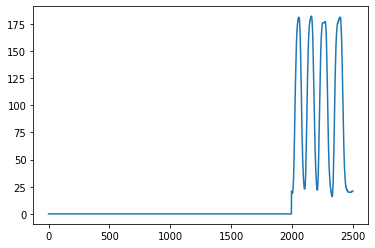

In [111]:
plt.plot(x_val[0,:,:1])

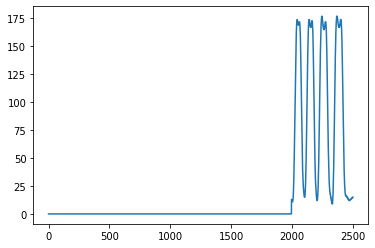

In [112]:
plt.plot(x_val[0,:,1:])

In [113]:
history = model.fit([x_train[:,:,0], x_train[:,:,1]], y_train,epochs=100, validation_split=0.2)

Epoch 1/100


InvalidArgumentError:  indices[15,1971] = -1 is not in [0, 2501)
	 [[node model_18/embedding_43/embedding_lookup (defined at <ipython-input-113-2fa617c1a1f4>:1) ]] [Op:__inference_train_function_231469]

Errors may have originated from an input operation.
Input Source operations connected to node model_18/embedding_43/embedding_lookup:
 model_18/embedding_43/embedding_lookup/226416 (defined at /usr/lib/python3.8/contextlib.py:113)

Function call stack:
train_function


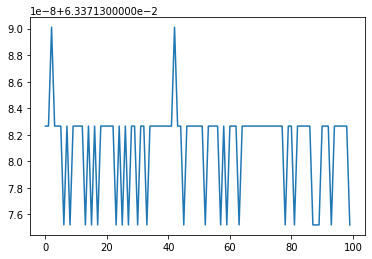

In [102]:
plt.plot(history.history['loss'])

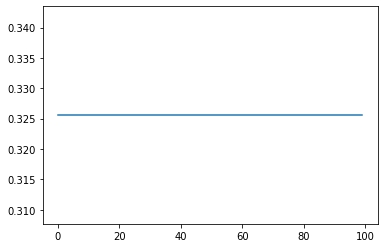

In [103]:
plt.plot(history.history['acc'])

In [104]:
y_pred = model.predict([x_test[:,:,0],x_test[:,:,1]])
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)